<a href="https://colab.research.google.com/github/DrewFinley/IMSE-541-HW/blob/main/A8_Ch_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats
from scipy import stats

# 6.8


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Table6.3.csv', sep=',', na_values=".")
data2 = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Table6.3(2).csv', sep=',', na_values=".")
data = [data[['x1','x2','x3','x4']]]
data
data2

,Number,X
0,1,6
1,2,10
2,3,7
3,4,8
4,5,9
...,...,...
75,76,14
76,77,10
77,78,11
78,79,12


In [3]:
x=np.reshape(data, (20,4))
x

array([[ 6,  9, 10, 15],
       [10,  4,  6, 11],
       [ 7,  8, 10,  5],
       [ 8,  9,  6, 13],
       [ 9, 10,  7, 13],
       [12, 11, 10, 10],
       [16, 10,  8,  9],
       [ 7,  5, 10,  4],
       [ 9,  7,  8, 12],
       [15, 16, 10, 13],
       [ 8, 12, 14, 16],
       [ 6, 13,  9, 11],
       [16,  9, 13, 15],
       [ 7, 13, 10, 12],
       [11,  7, 10, 16],
       [15, 10, 11, 14],
       [ 9,  8, 12, 10],
       [15,  7, 10, 11],
       [ 8,  6,  9, 12],
       [13, 14, 11, 15]])

In [4]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = []

In [5]:
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
print(x_bar)
print(r)
m=len(x_bar)
print('points in x, ', m)
print(statistics.mean(r))

[10.0, 7.75, 7.5, 9.0, 9.75, 10.75, 10.75, 6.5, 9.0, 13.5, 12.5, 9.75, 13.25, 10.5, 11.0, 12.5, 9.75, 10.75, 8.75, 13.25]
[9, 7, 5, 7, 6, 2, 8, 6, 5, 6, 8, 7, 7, 6, 9, 5, 4, 8, 6, 4]
points in x,  20
6


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

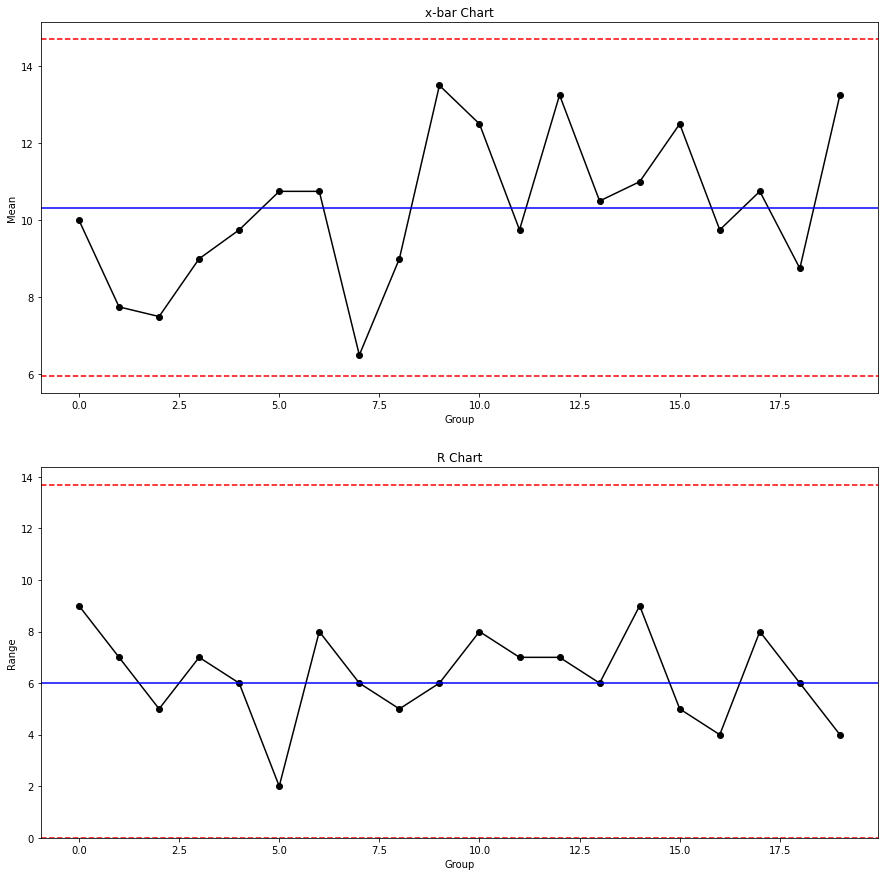

In [6]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
# Chart parameters A2=0.729, D3, and D4 see the ref for other sample size
A2=0.729 #n=4
D3=0     #n=4
D4=2.282 #n=4

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

In [7]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+A2*statistics.mean(r) or group < statistics.mean(x_bar)-A2*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [8]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > D4*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


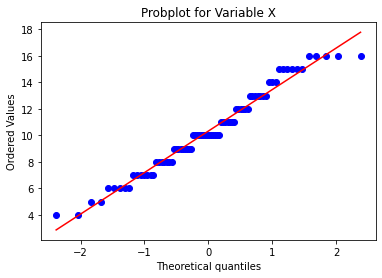

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(data2['X'], plot=ax)
ax.set_title("Probplot for Variable X")
plt.show()

# 6.63

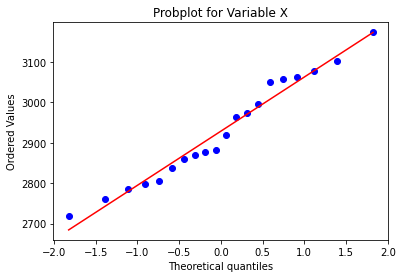

,Test,V,MR
0,1,2838,NaN
1,2,2785,53.0
2,3,3058,273.0
3,4,3064,6.0
4,5,2996,68.0
5,6,2882,114.0
6,7,2878,4.0
7,8,2920,42.0
8,9,3050,130.0
9,10,2870,180.0


In [10]:
xx = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Table6.22.csv', sep=',', na_values=".")
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(xx['V'], plot=ax)
ax.set_title("Probplot for Variable X")
plt.show()
xx

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Unit')]

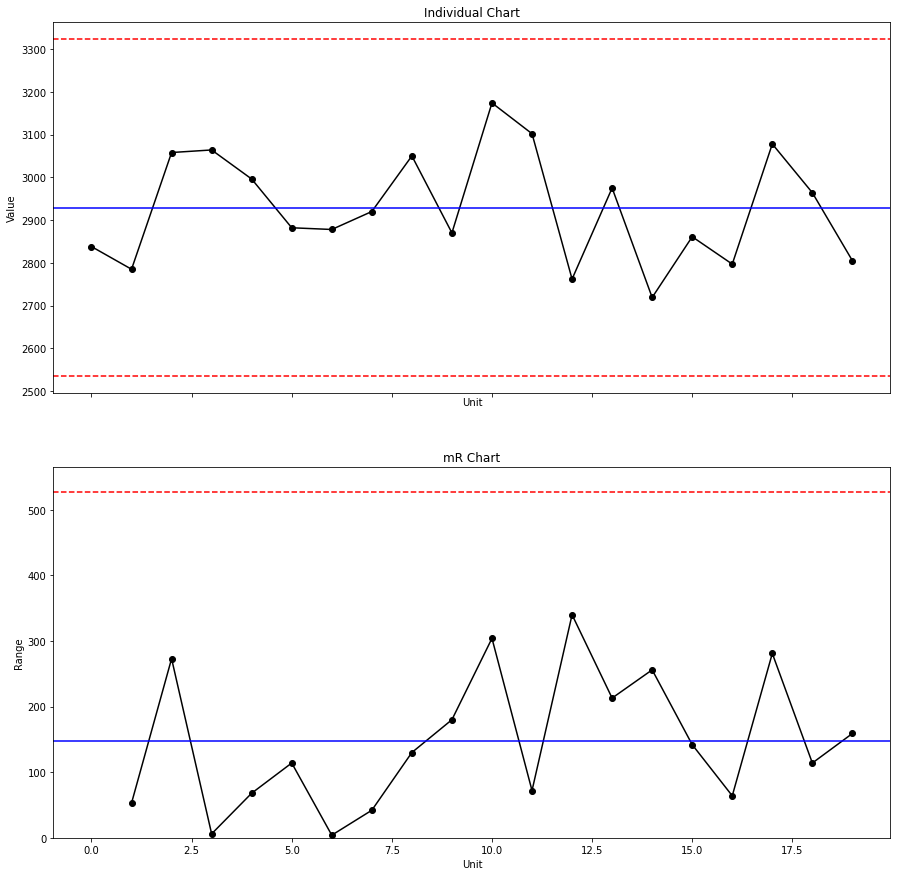

In [11]:
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)
# x chart
axs[0].plot(xx['V'], linestyle='-', marker='o', color='black')
axs[0].axhline(statistics.mean(xx['V']), color='blue')
axs[0].axhline(statistics.mean(xx['V'])+3*statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].axhline(statistics.mean(xx['V'])-3*statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set(xlabel='Unit', ylabel='Value')

# mR chart
axs[1].plot(xx['MR'], linestyle='-', marker='o', color='black')
axs[1].axhline(statistics.mean(xx['MR'][1:len(xx['MR'])]), color='blue')
axs[1].axhline(statistics.mean(xx['MR'][1:len(xx['MR'])])+3*statistics.mean(xx['MR'][1:len(xx['MR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].axhline(statistics.mean(xx['MR'][1:len(xx['MR'])])-3*statistics.mean(xx['MR'][1:len(xx['MR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('mR Chart')
axs[1].set(xlabel='Unit', ylabel='Range')

In [12]:
# Validate points out of control limits for x chart
i = 0
control = True
for unit in xx['V']:
    if unit > statistics.mean(xx['V'])+3*statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128 or unit < statistics.mean(xx['V'])-3*statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128:
        print('Unit', i, 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for mR chart
i = 0
control = True
for unit in xx['MR']:
    if unit > statistics.mean(xx['MR'][1:len(xx['MR'])])+3*statistics.mean(xx['MR'][1:len(xx['MR'])])*0.8525 or unit < statistics.mean(xx['MR'][1:len(xx['MR'])])-3*statistics.mean(xx['MR'][1:len(xx['MR'])])*0.8525:
        print('Unit', i, 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.
All points within control limits.


In [13]:
print('xbar: ',statistics.mean(xx['V']))
print('sigma hat: ', statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128)

xbar:  2928.9
sigma hat:  131.34565136244868


# 6.64

In [14]:
data6_64 = pd.read_csv('https://raw.githubusercontent.com/DrewFinley/IMSE-541-HW/main/Table6.22%20-%206.64.csv', sep=',', na_values=".")
data6_64

,Test,V,MR
0,1,2838,NaN
1,2,2785,53.0
2,3,3058,273.0
3,4,3064,6.0
4,5,2996,68.0
5,6,2882,114.0
6,7,2878,4.0
7,8,2920,42.0
8,9,3050,130.0
9,10,2870,180.0


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Unit')]

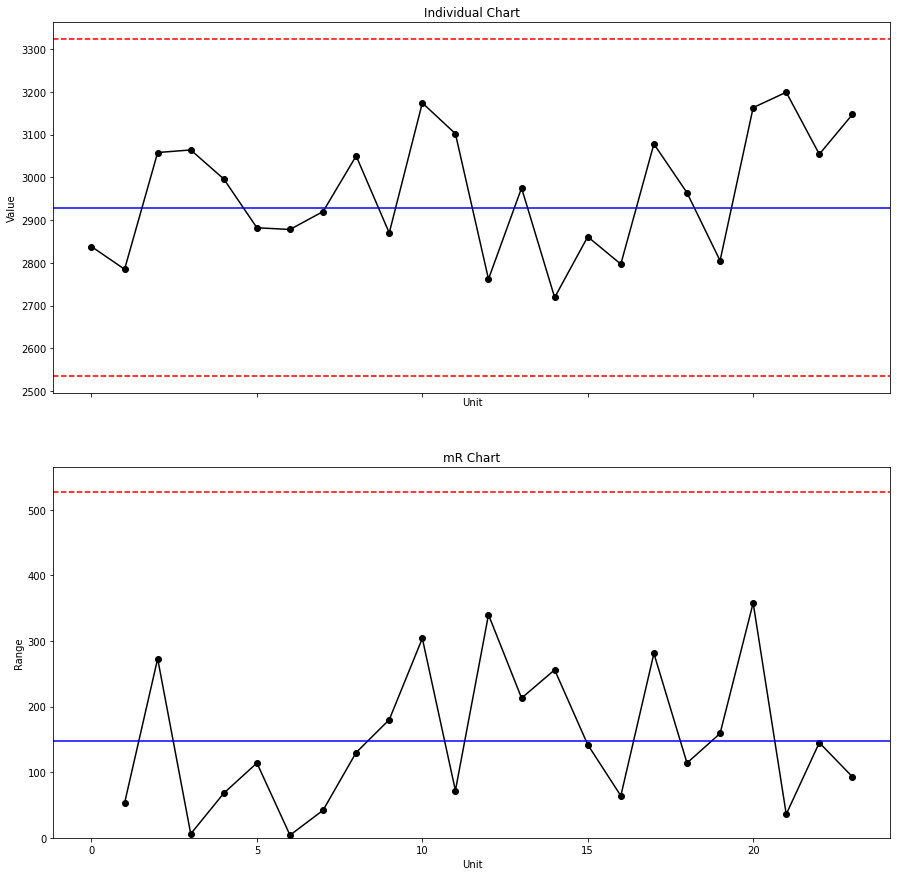

In [15]:
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)
# x chart
axs[0].plot(data6_64['V'], linestyle='-', marker='o', color='black')
axs[0].axhline(statistics.mean(xx['V']), color='blue')
axs[0].axhline(statistics.mean(xx['V'])+3*statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].axhline(statistics.mean(xx['V'])-3*statistics.mean(xx['MR'][1:len(xx['MR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set(xlabel='Unit', ylabel='Value')

# mR chart
axs[1].plot(data6_64['MR'], linestyle='-', marker='o', color='black')
axs[1].axhline(statistics.mean(xx['MR'][1:len(xx['MR'])]), color='blue')
axs[1].axhline(statistics.mean(xx['MR'][1:len(xx['MR'])])+3*statistics.mean(xx['MR'][1:len(xx['MR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].axhline(statistics.mean(xx['MR'][1:len(xx['MR'])])-3*statistics.mean(xx['MR'][1:len(xx['MR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('mR Chart')
axs[1].set(xlabel='Unit', ylabel='Range')